#### DeathFromDisease model evaluation

In [2]:
#Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score,confusion_matrix

In [3]:
#En son veriler
X_train=pd.read_csv("X_train.csv", index_col="ID")
X_test=pd.read_csv("X_test.csv", index_col="ID")
y_train=pd.read_csv("y_train.csv", index_col="ID")
y_test=pd.read_csv("y_test.csv", index_col="ID")

In [4]:
####train encoding
y_train_death=y_train["DeathFromDisease"]

####test encoding
y_test_death=y_test["DeathFromDisease"]

In [7]:
y_train_death.value_counts()

DeathFromDisease
0    220
1     78
Name: count, dtype: int64

In [9]:
y_test_death.value_counts()

DeathFromDisease
0    57
1    18
Name: count, dtype: int64

In [10]:
#### Import selected features for INSS
selected_features_death = pd.read_csv("final_common_features_for_DeathFromDisease.csv",index_col=False)
#### Put them in a list
selected_features = selected_features_death['FeatureName'].tolist()

#### selected feature matrix for X_train
X_train_sub_death = X_train[selected_features]
print(X_train_sub_death.shape)

#### selected feature matrix for X_train
X_test_sub_death = X_test[selected_features]
print(X_test_sub_death.shape)

(298, 86)
(75, 86)


#### RANDOM FOREST MODEL EVALUATION FOR SELECTED FEATURES

Confusion Matrix:
    0   1
0  48   9
1   7  11
Accuracy: 0.7866666666666666
Precision: 0.55
Recall: 0.6111111111111112
F1-score: 0.5789473684210527
ROC-AUC: 0.8401559454191033
PR-AUC: 0.5506944509095048


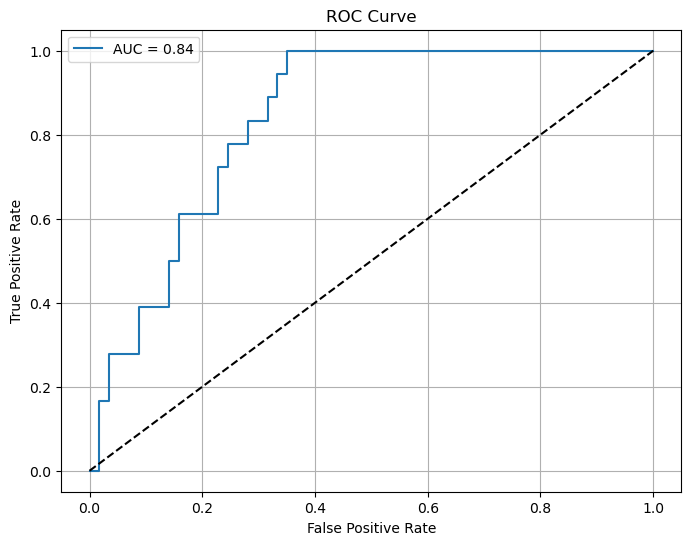

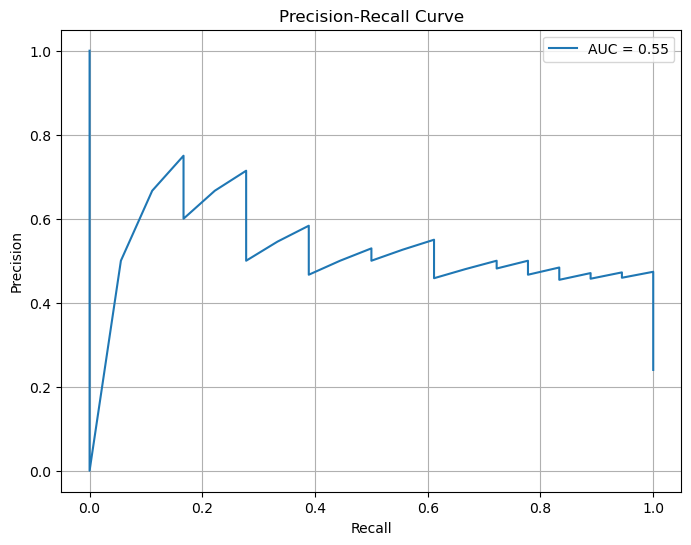

In [11]:
# Create a classifier
best_params =  {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}
clf = RandomForestClassifier(**best_params, random_state=42)

X_train=X_train_sub_death.copy()
X_test=X_test_sub_death.copy()
y_train= y_train_death.copy()
y_test= y_test_death.copy()
class_labels= y_test_death.unique().tolist()

# Train the Random Forest classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_probs = clf.predict_proba(X_test)
y_pred = (y_pred_probs[:, 1] > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate ROC-AUC for this fold
fpr, tpr, _ = roc_curve(y_test, y_pred_probs[:, 1])
roc_auc = roc_auc_score(y_test, y_pred_probs[:, 1])

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)
print("Confusion Matrix:")
print(confusion_matrix_df)

# Calculate Precision-Recall values
precision_fold, recall_fold, _ = precision_recall_curve(y_test, y_pred_probs[:, 1])

# Calculate PR-AUC for this fold
pr_auc = average_precision_score(y_test, y_pred_probs[:, 1])

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)
print("PR-AUC:", pr_auc)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_fold, precision_fold, label=f'AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

#### SVM MODEL EVALUATION FOR SELECTED FEATURES

Confusion Matrix:
    0  1
0  50  7
1  10  8
Accuracy: 0.7733333333333333
Precision: 0.5333333333333333
Recall: 0.4444444444444444
F1-score: 0.4848484848484848
ROC-AUC: 0.8109161793372319
PR-AUC: 0.48295687336480886


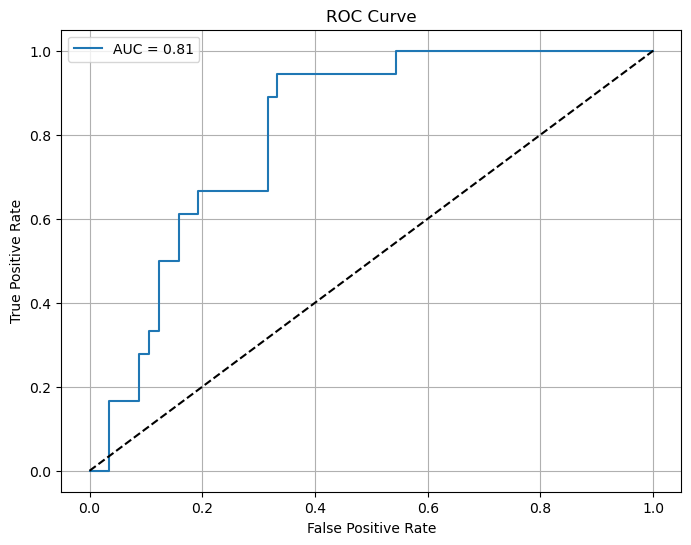

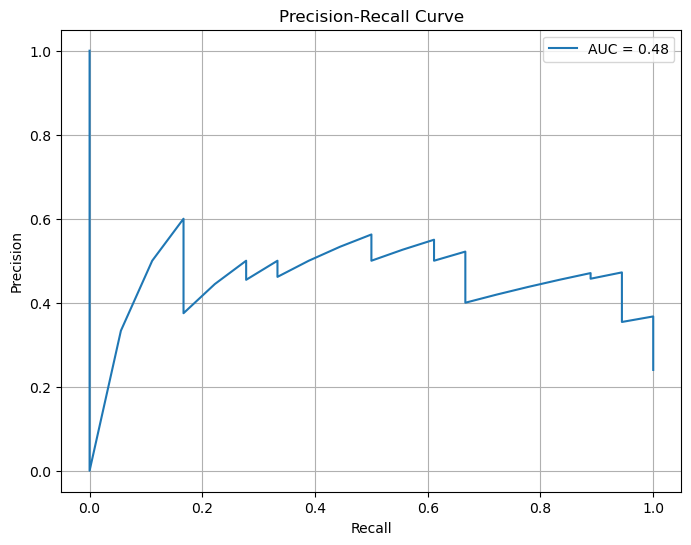

In [12]:
# Create a classifier
best_params =  {'C': 189.02181143134422, 'gamma': 0.013336031674559727}
clf = SVC(**best_params, random_state=42,probability=True)

X_train=X_train_sub_death.copy()
X_test=X_test_sub_death.copy()
y_train= y_train_death.copy()
y_test= y_test_death.copy()
class_labels= y_test_death.unique().tolist()

# Train the Random Forest classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_probs = clf.predict_proba(X_test)
y_pred = (y_pred_probs[:, 1] > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate ROC-AUC for this fold
fpr, tpr, _ = roc_curve(y_test, y_pred_probs[:, 1])
roc_auc = roc_auc_score(y_test, y_pred_probs[:, 1])

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)
print("Confusion Matrix:")
print(confusion_matrix_df)

# Calculate Precision-Recall values
precision_fold, recall_fold, _ = precision_recall_curve(y_test, y_pred_probs[:, 1])

# Calculate PR-AUC for this fold
pr_auc = average_precision_score(y_test, y_pred_probs[:, 1])

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)
print("PR-AUC:", pr_auc)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_fold, precision_fold, label=f'AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

#### LOGISTIC REGRESSION MODEL EVALUATION FOR SELECTED FEATURES

Confusion Matrix:
    0   1
0  46  11
1   9   9
Accuracy: 0.7333333333333333
Precision: 0.45
Recall: 0.5
F1-score: 0.4736842105263158
ROC-AUC: 0.7943469785575049
PR-AUC: 0.5180183285742684


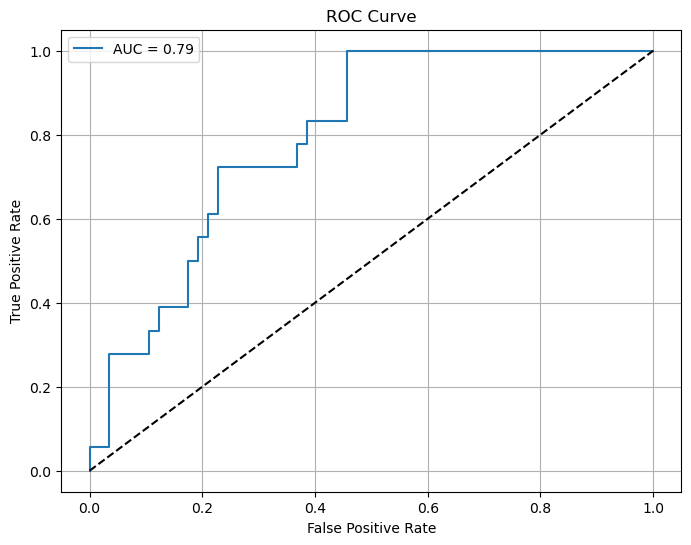

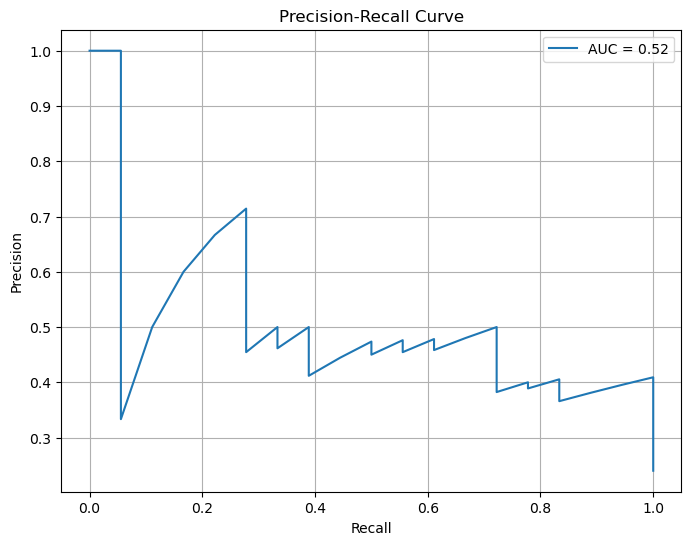

In [13]:
# Create a classifier
best_params =  {'C': 0.615848211066026, 'penalty': 'l1', 'solver': 'liblinear'}
clf = LogisticRegression(**best_params, random_state=42)

X_train=X_train_sub_death.copy()
X_test=X_test_sub_death.copy()
y_train= y_train_death.copy()
y_test= y_test_death.copy()
class_labels= y_test_death.unique().tolist()

# Train the Random Forest classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_probs = clf.predict_proba(X_test)
y_pred = (y_pred_probs[:, 1] > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate ROC-AUC for this fold
fpr, tpr, _ = roc_curve(y_test, y_pred_probs[:, 1])
roc_auc = roc_auc_score(y_test, y_pred_probs[:, 1])

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)
print("Confusion Matrix:")
print(confusion_matrix_df)

# Calculate Precision-Recall values
precision_fold, recall_fold, _ = precision_recall_curve(y_test, y_pred_probs[:, 1])

# Calculate PR-AUC for this fold
pr_auc = average_precision_score(y_test, y_pred_probs[:, 1])

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)
print("PR-AUC:", pr_auc)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_fold, precision_fold, label=f'AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

#### RANDOM FOREST MODEL EVALUATION FOR ALL FEATURES

Confusion Matrix:
    0   1
0  48   9
1   8  10
Accuracy: 0.7733333333333333
Precision: 0.5263157894736842
Recall: 0.5555555555555556
F1-score: 0.5405405405405405
ROC-AUC: 0.8304093567251462
PR-AUC: 0.524497359232902


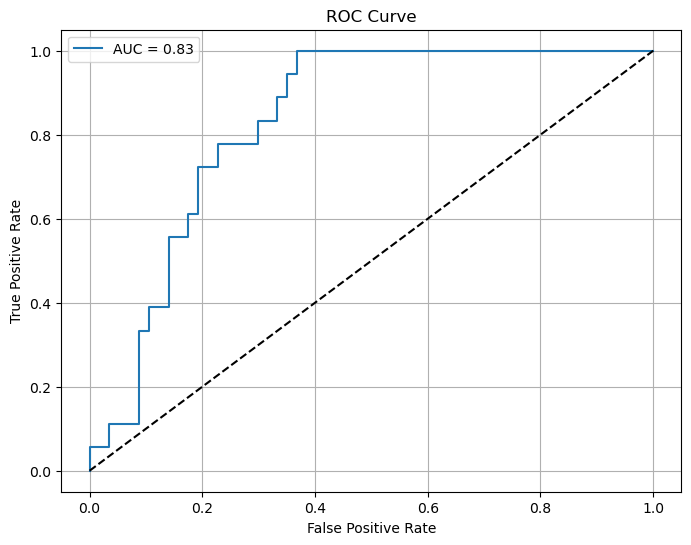

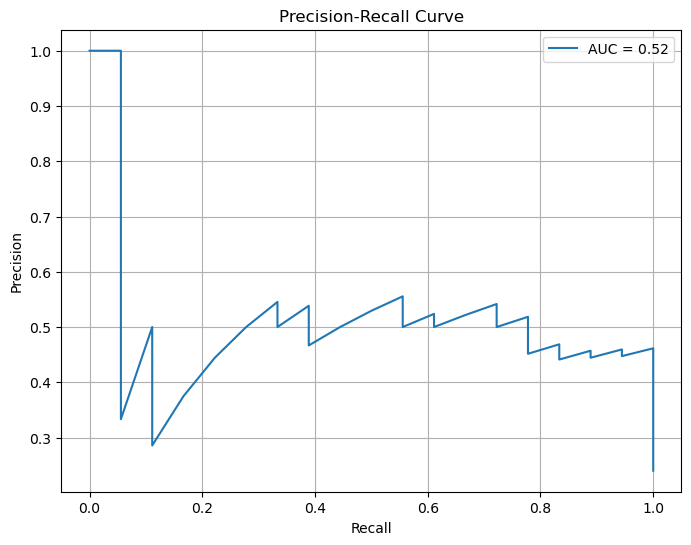

In [14]:
# Create a classifier
best_params =  {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 300}
clf = RandomForestClassifier(**best_params, random_state=42)

X_train=X_train.copy()
X_test=X_test.copy()
y_train= y_train_death.copy()
y_test= y_test_death.copy()
class_labels= y_test_death.unique().tolist()

# Train the Random Forest classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_probs = clf.predict_proba(X_test)
y_pred = (y_pred_probs[:, 1] > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate ROC-AUC for this fold
fpr, tpr, _ = roc_curve(y_test, y_pred_probs[:, 1])
roc_auc = roc_auc_score(y_test, y_pred_probs[:, 1])

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)
print("Confusion Matrix:")
print(confusion_matrix_df)

# Calculate Precision-Recall values
precision_fold, recall_fold, _ = precision_recall_curve(y_test, y_pred_probs[:, 1])

# Calculate PR-AUC for this fold
pr_auc = average_precision_score(y_test, y_pred_probs[:, 1])

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)
print("PR-AUC:", pr_auc)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_fold, precision_fold, label=f'AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

#### SVM MODEL EVALUATION FOR ALL FEATURES

Confusion Matrix:
    0  1
0  48  9
1  13  5
Accuracy: 0.7066666666666667
Precision: 0.35714285714285715
Recall: 0.2777777777777778
F1-score: 0.31250000000000006
ROC-AUC: 0.746588693957115
PR-AUC: 0.49040876642432396


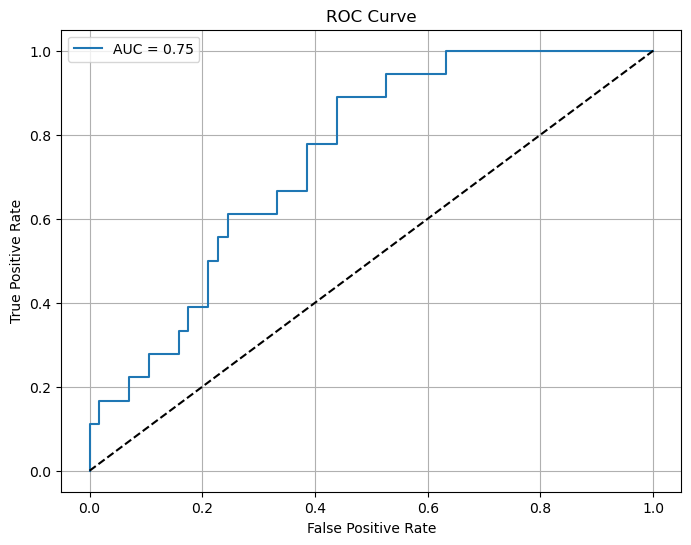

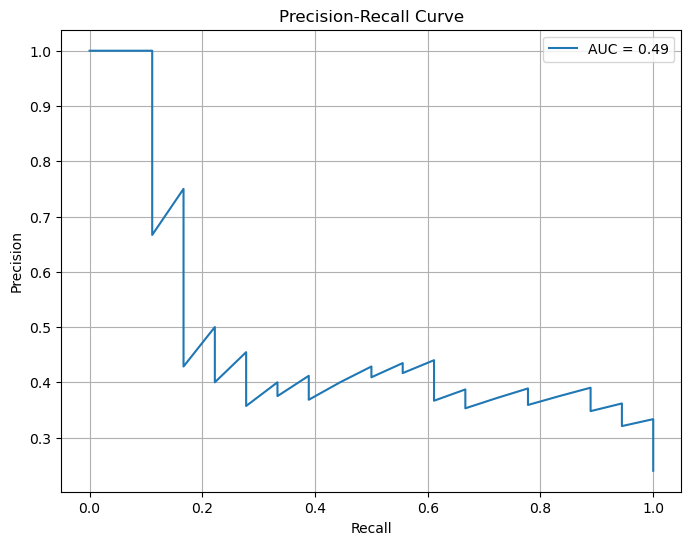

In [15]:
# Create a classifier
best_params = {'C': 166.68236778150623, 'gamma': 0.0007178741659546704}
clf = SVC(**best_params, random_state=42,probability=True)

X_train=X_train.copy()
X_test=X_test.copy()
y_train= y_train_death.copy()
y_test= y_test_death.copy()
class_labels= y_test_death.unique().tolist()

# Train the Random Forest classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_probs = clf.predict_proba(X_test)
y_pred = (y_pred_probs[:, 1] > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate ROC-AUC for this fold
fpr, tpr, _ = roc_curve(y_test, y_pred_probs[:, 1])
roc_auc = roc_auc_score(y_test, y_pred_probs[:, 1])

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)
print("Confusion Matrix:")
print(confusion_matrix_df)

# Calculate Precision-Recall values
precision_fold, recall_fold, _ = precision_recall_curve(y_test, y_pred_probs[:, 1])

# Calculate PR-AUC for this fold
pr_auc = average_precision_score(y_test, y_pred_probs[:, 1])

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)
print("PR-AUC:", pr_auc)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_fold, precision_fold, label=f'AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

#### LOGISTIC REGRESSION MODEL EVALUATION FOR ALL FEATURES

Confusion Matrix:
    0   1
0  47  10
1   7  11
Accuracy: 0.7733333333333333
Precision: 0.5238095238095238
Recall: 0.6111111111111112
F1-score: 0.5641025641025642
ROC-AUC: 0.8206627680311891
PR-AUC: 0.5143182745178396


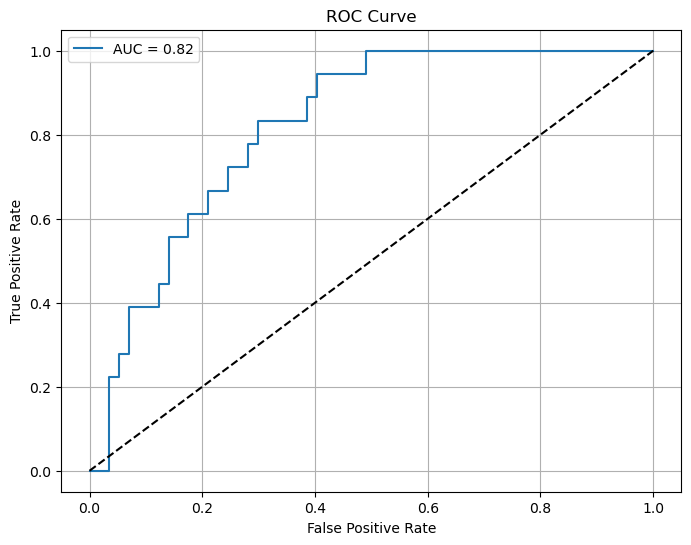

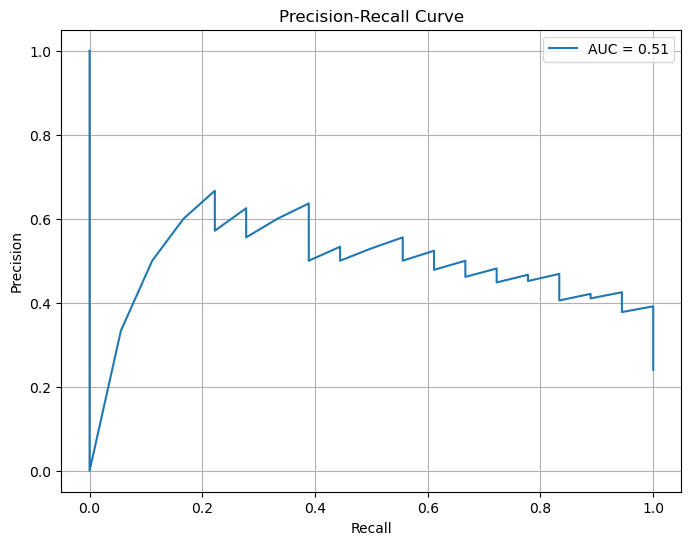

In [18]:
# Create a classifier
best_params = {'C': 0.08858667904100823, 'penalty': 'l1', 'solver': 'liblinear'}
clf = LogisticRegression(**best_params, random_state=42)

X_train=X_train.copy()
X_test=X_test.copy()
y_train= y_train_death.copy()
y_test= y_test_death.copy()
class_labels= y_test_death.unique().tolist()

# Train the Random Forest classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_probs = clf.predict_proba(X_test)
y_pred = (y_pred_probs[:, 1] > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate ROC-AUC for this fold
fpr, tpr, _ = roc_curve(y_test, y_pred_probs[:, 1])
roc_auc = roc_auc_score(y_test, y_pred_probs[:, 1])

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)
print("Confusion Matrix:")
print(confusion_matrix_df)

# Calculate Precision-Recall values
precision_fold, recall_fold, _ = precision_recall_curve(y_test, y_pred_probs[:, 1])

# Calculate PR-AUC for this fold
pr_auc = average_precision_score(y_test, y_pred_probs[:, 1])

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)
print("PR-AUC:", pr_auc)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_fold, precision_fold, label=f'AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

TRIALS

In [ ]:
#SMOTE
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
X_smo,y_smo = sm.fit_resample(X,y)

In [ ]:
y_smo.value_counts()

DeathFromDisease
0    220
1    220
Name: count, dtype: int64

In [ ]:
#Import necessary libraries
from sklearn.model_selection import  GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, average_precision_score

##############FOR RANDOM FOREST-HYPER PARAMETER TUNING#########################

# Set the parameters for grid search (for Random Forest) #we can give choices inside in list as much as we want
param_grid = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]#choices 2,5 and 10
}

# Initialize a RandomForestClassifier (define the Random Forest classifier)
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV (define the grid search algorithm)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5) #here in param_grid ,we provide the param_grid that we set above

# Fit GridSearchCV
grid_search.fit(X_smo, y_smo)
#during grid search for train set, every possible combinations of the parameter choices that we set above will be tested.
#And for ever single parameter combination, it will run cross_validation for 5 folds

#after that we obtain the best parameters from the grid search

# Get the best parameters (for the random forest)
best_params = grid_search.best_params_
print('Best parameters for RandomForestClassifier: ', best_params)

Best parameters for RandomForestClassifier:  {'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 200}
